**Spanning Tree** - is a subgraph that of the graph G that is a tree and includes all vertices of G. <br>
**Minimum Spanning Tree** - is a spanning tree with smallest total weight. <br>
**Kruskal's Algorithm** - finds the Minimum Spanning Tree: <br>
- start with an empty graph T
- repeat n-1 times
- add to T an edge of the smallest weight which doesn't create a cycle in T

/var/folders/78/lstcwc951zs14wpz1_zzh_cc0000gn/T/ipykernel_4999/2680901696.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


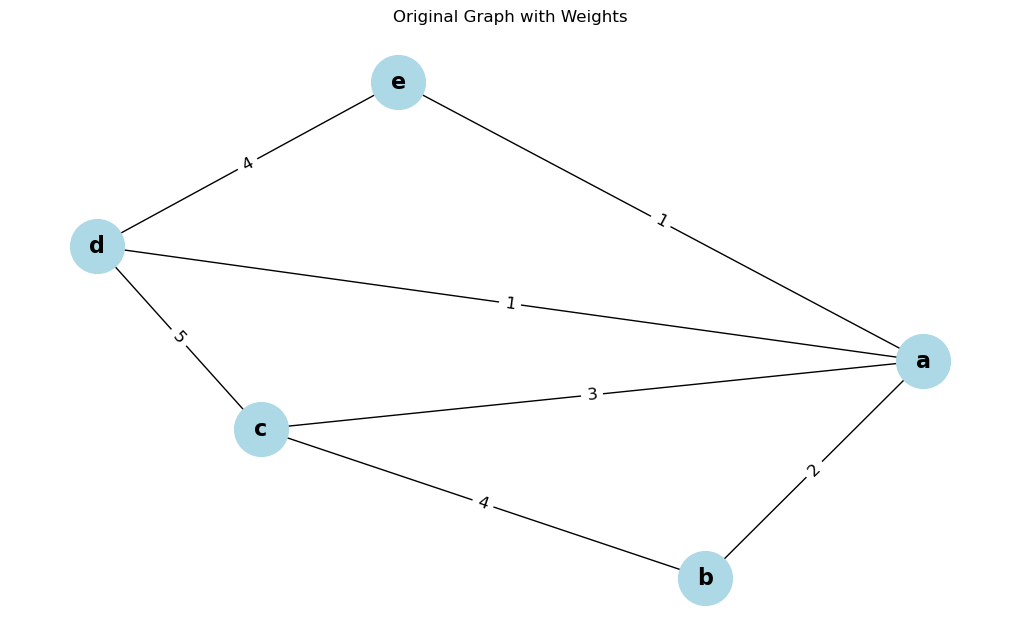

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph
G = nx.Graph()
G.add_edges_from([
    ('a', 'b', {'weight': 2}), 
    ('a', 'c', {'weight': 3}), 
    ('a', 'd', {'weight': 1}), 
    ('a', 'e', {'weight': 3}), 
    ('b', 'c', {'weight': 4}), 
    ('c', 'd', {'weight': 5}), 
    ('d', 'e', {'weight': 4}), 
    ('e', 'a', {'weight': 1})
])

# Draw the graph
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=1500, font_size=16, font_weight='bold')

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=12)

plt.title("Original Graph with Weights")
plt.axis('off')
plt.tight_layout()
plt.show()

## Kruskal's Algorithm Implementation


In [5]:
class UnionFind:
    """Simple Union-Find (Disjoint Set) data structure"""
    def __init__(self, vertices):
        self.parent = {v: v for v in vertices}
        self.rank = {v: 0 for v in vertices}
    
    def find(self, vertex):
        """Find the root of the set containing vertex"""
        if self.parent[vertex] != vertex:
            self.parent[vertex] = self.find(self.parent[vertex])  # Path compression
        return self.parent[vertex]
    
    def union(self, v1, v2):
        """Union two sets containing v1 and v2"""
        root1 = self.find(v1)
        root2 = self.find(v2)
        
        if root1 == root2:
            return False  # Already in same set (would create cycle)
        
        # Union by rank
        if self.rank[root1] < self.rank[root2]:
            self.parent[root1] = root2
        elif self.rank[root1] > self.rank[root2]:
            self.parent[root2] = root1
        else:
            self.parent[root2] = root1
            self.rank[root1] += 1
        
        return True


def kruskals_algorithm(graph):
    """
    Kruskal's Algorithm to find Minimum Spanning Tree
    
    Args:
        graph: NetworkX graph with 'weight' attribute on edges
    
    Returns:
        List of edges in the MST and total weight
    """
    # Get all edges with weights
    edges = [(u, v, data['weight']) for u, v, data in graph.edges(data=True)]
    
    # Sort edges by weight
    edges.sort(key=lambda x: x[2])
    
    # Initialize Union-Find
    vertices = list(graph.nodes())
    uf = UnionFind(vertices)
    
    # Build MST
    mst_edges = []
    total_weight = 0
    
    for u, v, weight in edges:
        # If adding this edge doesn't create a cycle
        if uf.union(u, v):
            mst_edges.append((u, v, weight))
            total_weight += weight
            
            # Stop when we have n-1 edges (complete MST)
            if len(mst_edges) == len(vertices) - 1:
                break
    
    return mst_edges, total_weight


# Apply Kruskal's algorithm to our graph
mst_edges, total_weight = kruskals_algorithm(G)

print("Minimum Spanning Tree Edges:")
for u, v, weight in mst_edges:
    print(f"  {u} -- {v} (weight: {weight})")
print(f"\nTotal MST weight: {total_weight}")

Minimum Spanning Tree Edges:
  a -- d (weight: 1)
  a -- e (weight: 1)
  a -- b (weight: 2)
  a -- c (weight: 3)

Total MST weight: 7


/var/folders/78/lstcwc951zs14wpz1_zzh_cc0000gn/T/ipykernel_4999/2643150264.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


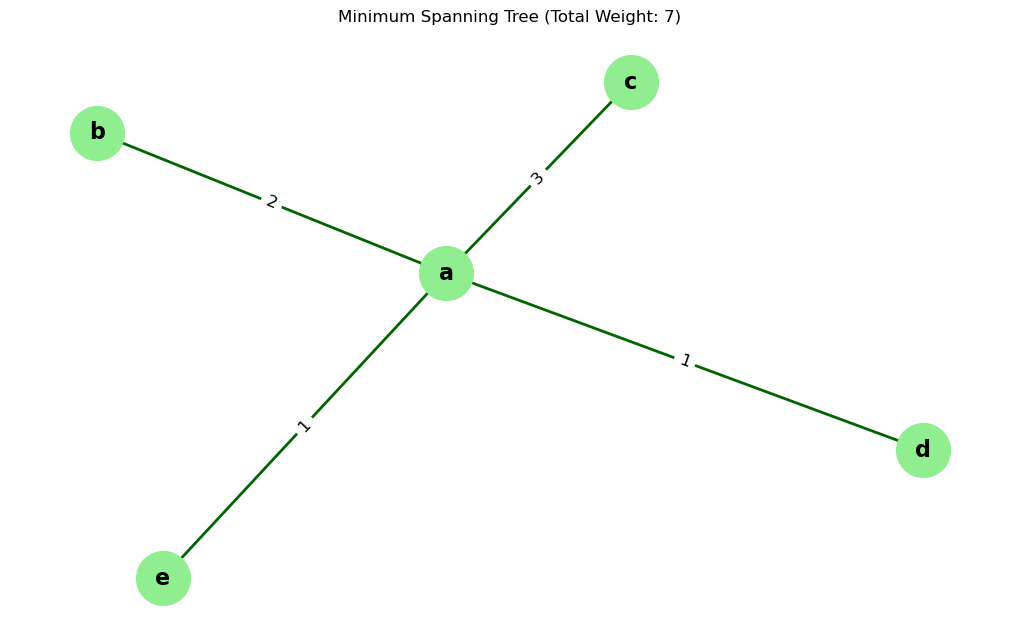

In [ ]:
# Visualize the Minimum Spanning Tree
MST = nx.Graph()
MST.add_weighted_edges_from(mst_edges)

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(MST, seed=42)

nx.draw(MST, pos, with_labels=True, node_color='lightgreen', 
        node_size=1500, font_size=16, font_weight='bold',
        edge_color='darkgreen', width=2)

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(MST, 'weight')
nx.draw_networkx_edge_labels(MST, pos, edge_labels, font_size=12)

plt.title(f"Minimum Spanning Tree (Total Weight: {total_weight})")
plt.axis('off')
plt.tight_layout()
plt.show()

## Verification using NetworkX built-in function


In [7]:
# Verify with NetworkX's built-in function
mst_networkx = nx.minimum_spanning_tree(G, algorithm='kruskal')
print("NetworkX MST edges:")
for u, v, data in mst_networkx.edges(data=True):
    print(f"  {u} -- {v} (weight: {data['weight']})")
print(f"\nTotal weight: {sum(data['weight'] for u, v, data in mst_networkx.edges(data=True))}")

NetworkX MST edges:
  a -- d (weight: 1)
  a -- e (weight: 1)
  a -- b (weight: 2)
  a -- c (weight: 3)

Total weight: 7
